## Deep CNN for MNIST

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import utils

In [0]:
np.random.seed(1337)  # for reproducibility

### Parameters Setting

In [0]:
batch_size = 100
nb_classes = 10
nb_epoch = 12

img_rows, img_cols = 28, 28  # input image dimensions
pool_size = (2, 2)  # size of pooling area for max pooling
kernel_size = (3, 3)  # convolution kernel size

### Step 1. Data

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train=np.reshape(X_train,(-1,X_train.shape[1],X_train.shape[2],1))
X_test=np.reshape(X_test,(-1,X_test.shape[1],X_test.shape[2],1))

# convert class vectors to binary class matrices
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### Step 2. Deep CNN Model

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size, padding='same', input_shape=(X_train.shape[1],X_train.shape[2],1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(600))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

### Step 3. Loss,Optimizer, Metric

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Step 4. Train the model

In [0]:
history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=2, validation_split=0.2)

W0723 12:30:47.655200 139742363248512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 - 91s - loss: 0.3176 - accuracy: 0.8951 - val_loss: 0.0619 - val_accuracy: 0.9819
Epoch 2/12
48000/48000 - 149s - loss: 0.0896 - accuracy: 0.9726 - val_loss: 0.0447 - val_accuracy: 0.9871
Epoch 3/12
48000/48000 - 172s - loss: 0.0648 - accuracy: 0.9802 - val_loss: 0.0402 - val_accuracy: 0.9877
Epoch 4/12
48000/48000 - 171s - loss: 0.0534 - accuracy: 0.9823 - val_loss: 0.0317 - val_accuracy: 0.9902
Epoch 5/12
48000/48000 - 173s - loss: 0.0472 - accuracy: 0.9853 - val_loss: 0.0310 - val_accuracy: 0.9913
Epoch 6/12
48000/48000 - 173s - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.0264 - val_accuracy: 0.9917
Epoch 7/12
48000/48000 - 172s - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0276 - val_accuracy: 0.9913
Epoch 8/12
48000/48000 - 173s - loss: 0.0357 - accuracy: 0.9883 - val_loss: 0.0254 - val_accuracy: 0.9920
Epoch 9/12
48000/48000 - 170s - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0287 - val_accuracy: 0.99

### Step 5. Test the Model

In [0]:
score = model.evaluate(X_test, Y_test, verbose=2)

print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 - 5s - loss: 0.0234 - accuracy: 0.9927
Test score: 0.023400712714768998
Test accuracy: 0.9927


### Plot the Training/Validation loss

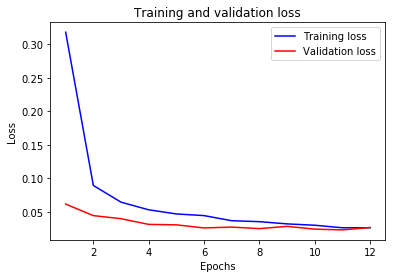

In [0]:
history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plot the Training/Validation Accuracy

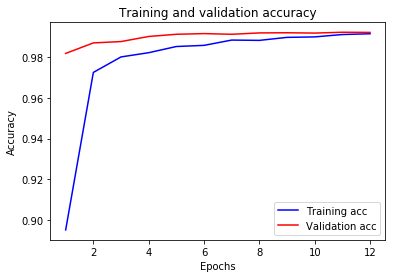

In [0]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()